In [76]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

sns.set()
data = pd.read_csv("diabetes.csv")

In [21]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
# changing irrelevant values
data.loc[ data.Pregnancies > 6, 'Pregnancies' ] = 6
data.loc[ data.Glucose < 70 , 'Glucose' ] = 70     
data.loc[ data.BloodPressure < 60 , 'BloodPressure' ] = 60 
data.loc[ data.BMI < 18 , 'BMI' ] = 18 
data.loc[ data.BMI > 40 , 'BMI' ] = 40
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.173177,121.476562,72.717448,20.536458,79.799479,31.651953,0.471876,33.240885,0.348958
std,2.250878,30.476519,10.950623,15.952218,115.244002,5.941621,0.331329,11.760232,0.476951
min,0.000000,70.000000,60.000000,0.000000,0.000000,18.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,6.000000,199.000000,122.000000,99.000000,846.000000,40.000000,2.420000,81.000000,1.000000


In [75]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [77]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [78]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [80]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


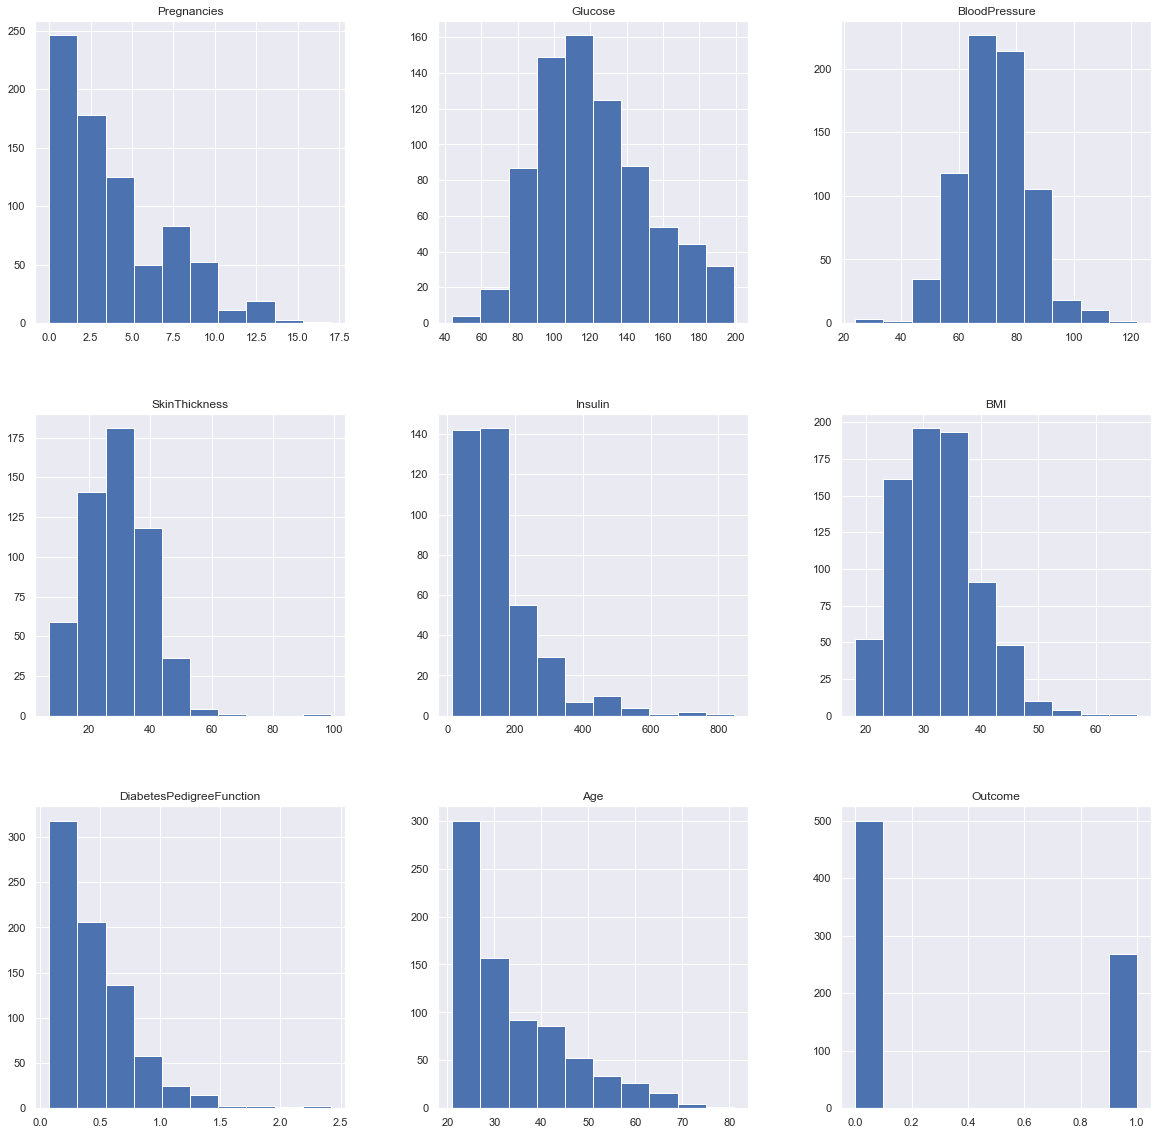

In [81]:
p = data.hist(figsize = (20,20))

In [82]:
# after analyzing the data distribution, we can choose proper methods to replace nan columns to meanningful value.

data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)

In [83]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


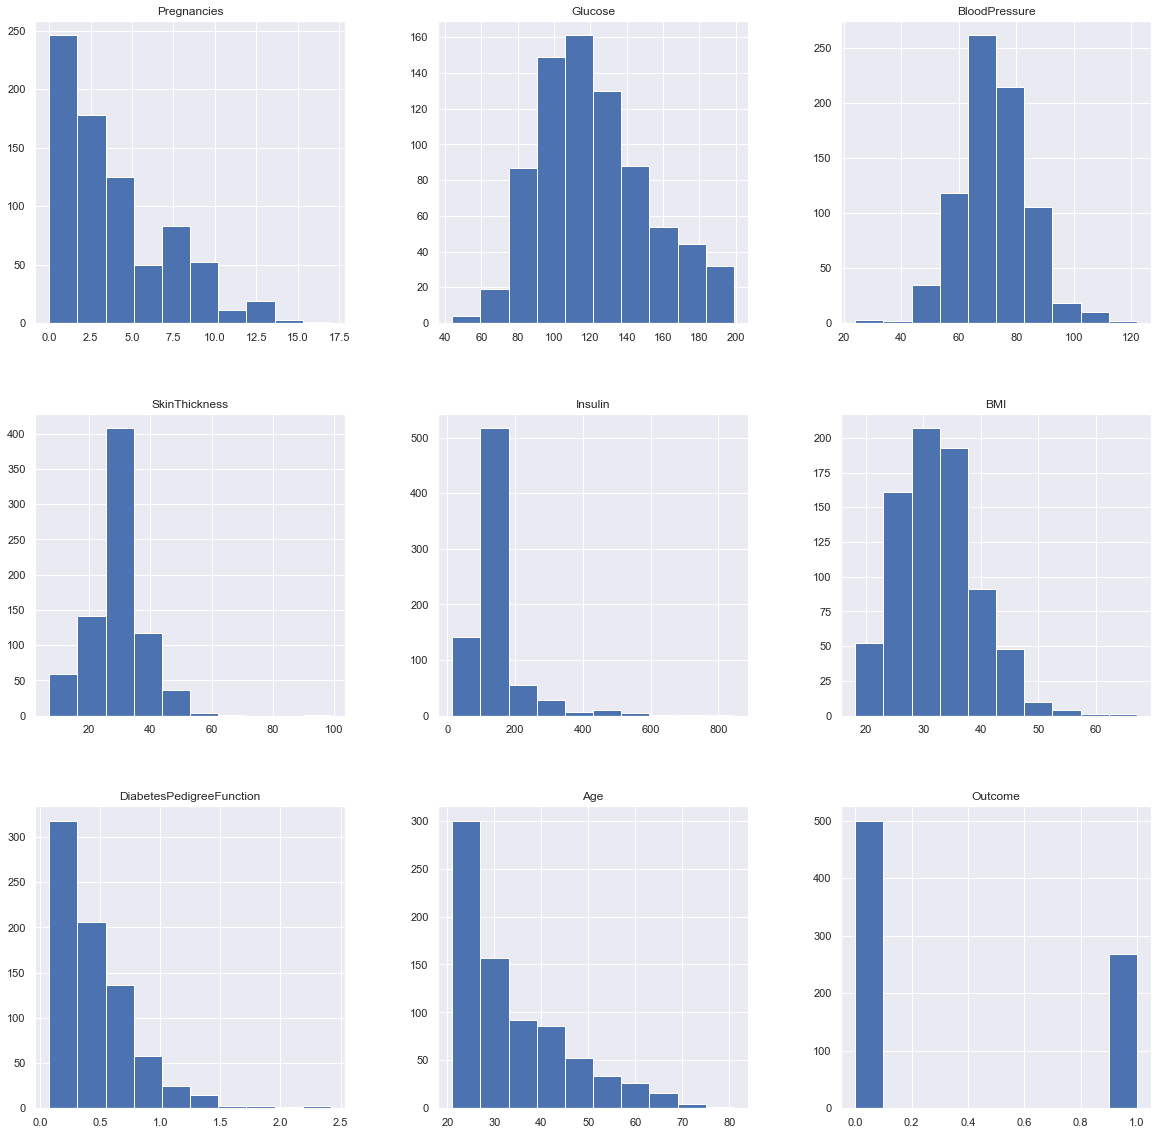

In [84]:
# Plot again after all NAN are removed.

p = data.hist(figsize = (20,20))

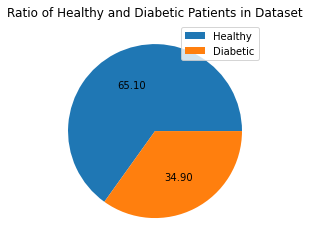

In [46]:
plt.title('Ratio of Healthy and Diabetic Patients in Dataset')
plt.pie(data['Outcome'].value_counts(),autopct='%.2f')
plt.legend(['Healthy','Diabetic'],)
plt.show()

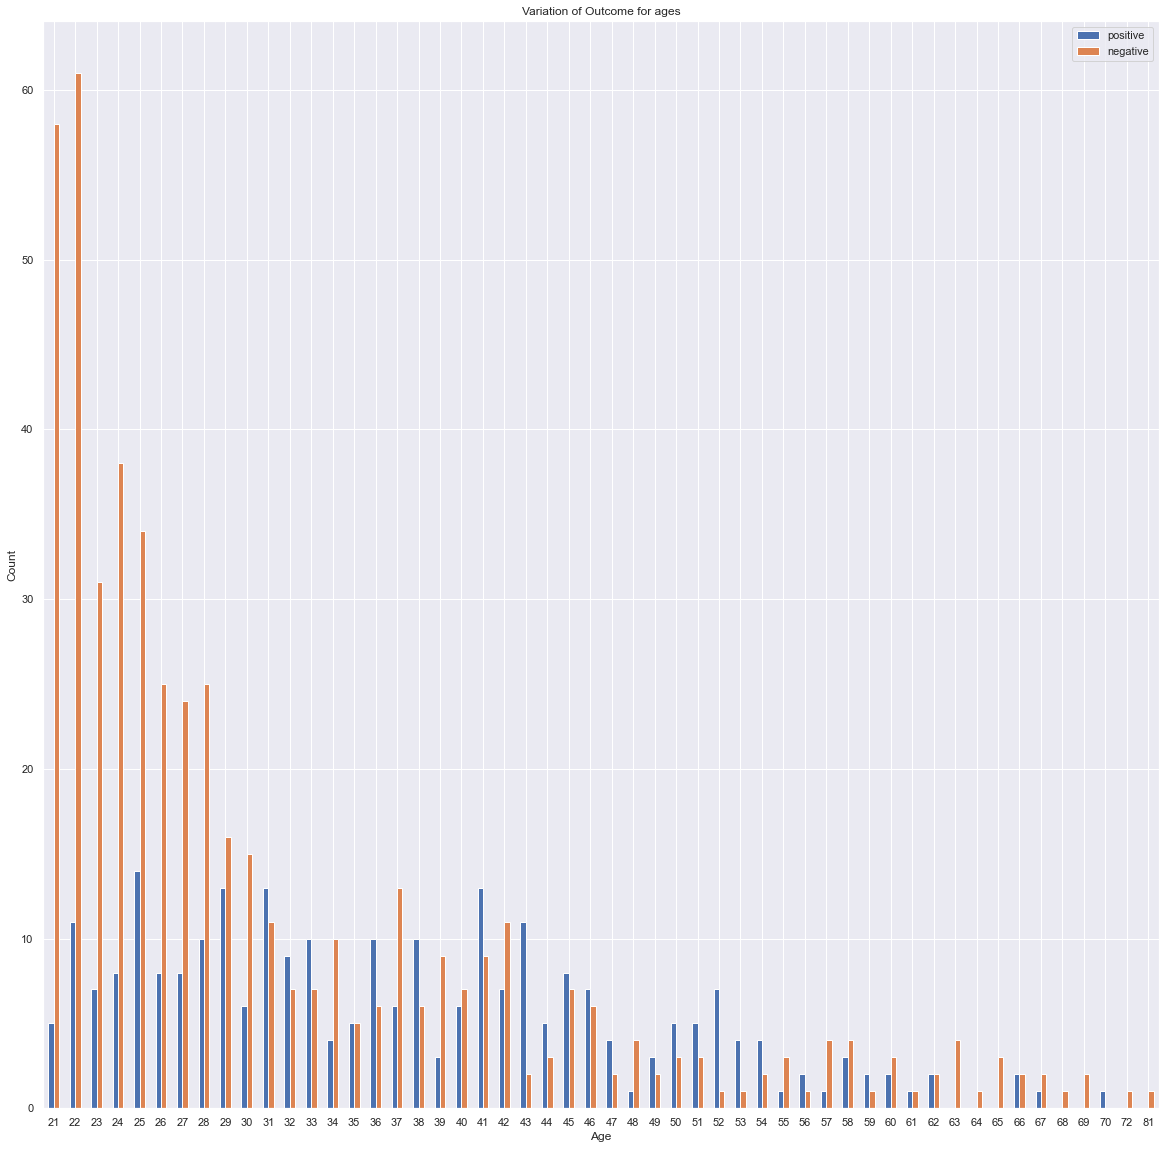

In [85]:
positive = data.loc[data['Outcome'] == 1]
negative = data.loc[data['Outcome'] == 0]
number_positive_each_age = positive.groupby('Age')['Outcome'].count()
number_negative_each_age = negative.groupby('Age')['Outcome'].count()
result = pd.DataFrame(dict(positive = number_positive_each_age, negative = number_negative_each_age)).reset_index().fillna(0).set_index('Age')
result.plot.bar(figsize=[20,20])
plt.xticks(rotation=360)
plt.title('Variation of Outcome for ages')
plt.ylabel('Count')
plt.xlabel('Age');
plt.show()

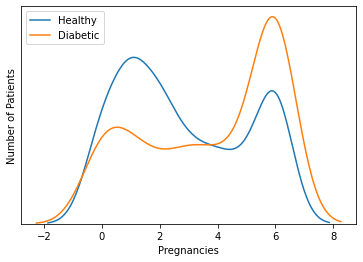

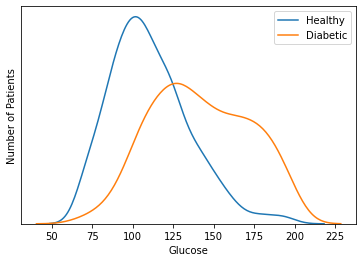

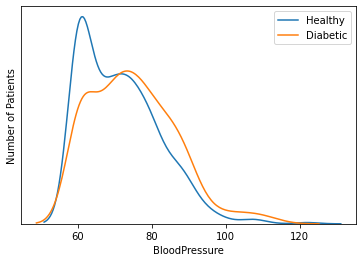

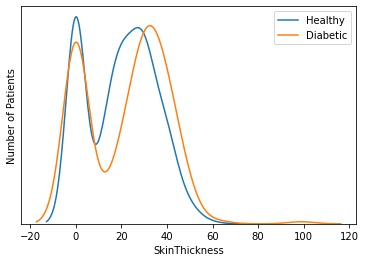

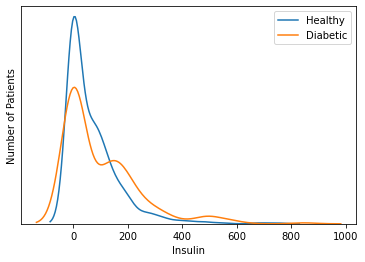

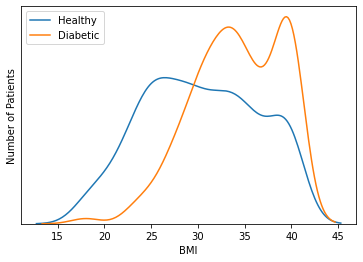

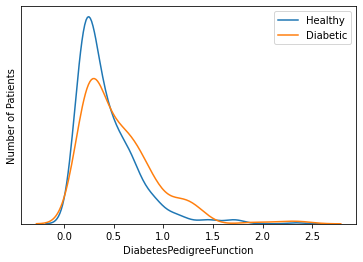

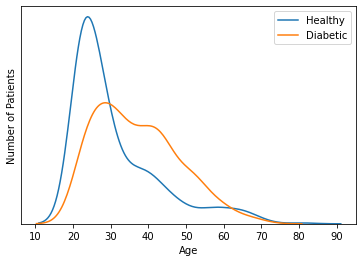

In [48]:
def plot(s):
    sns.kdeplot(data.loc[ data.Outcome == 0, s] )
    sns.kdeplot(data.loc[ data.Outcome == 1, s] )    
    plt.legend(['Healthy','Diabetic'])
    plt.ylabel('Number of Patients')
    plt.yticks([])
    plt.show()
    
for i in data.columns[:-1]:
    plot(i)

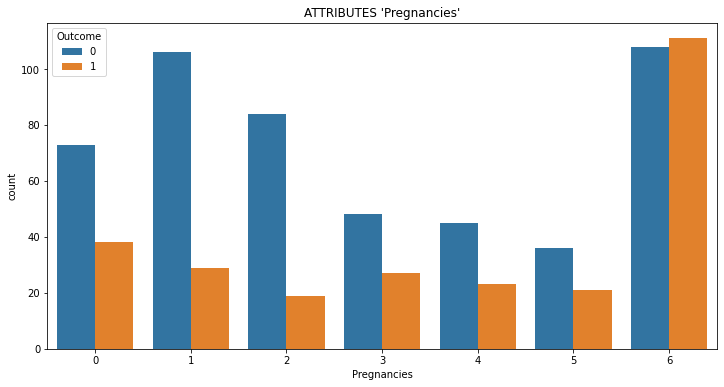

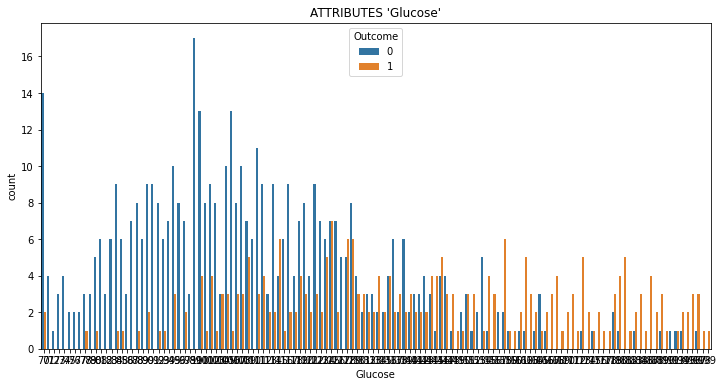

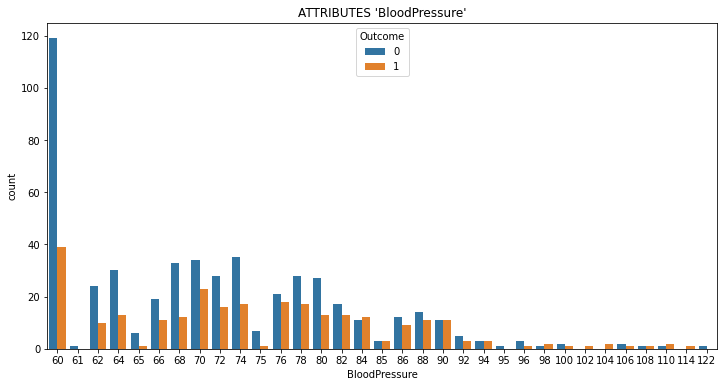

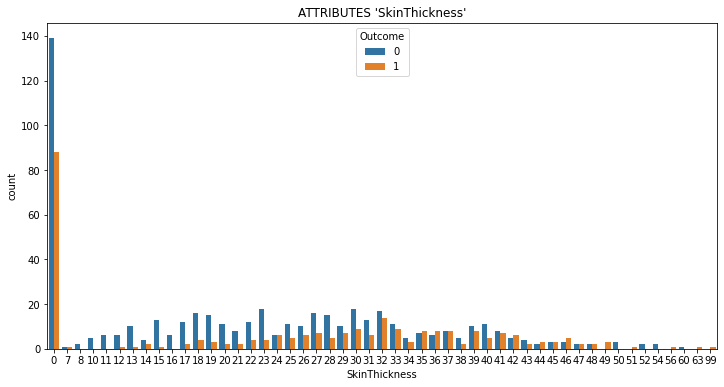

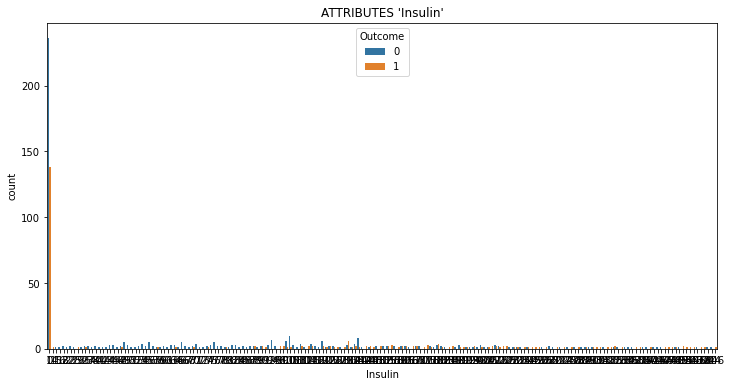

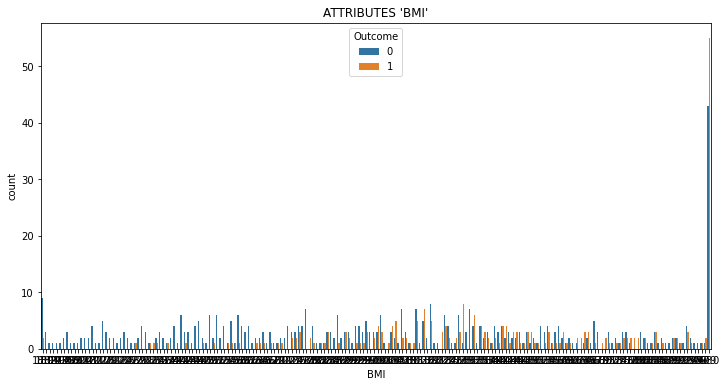

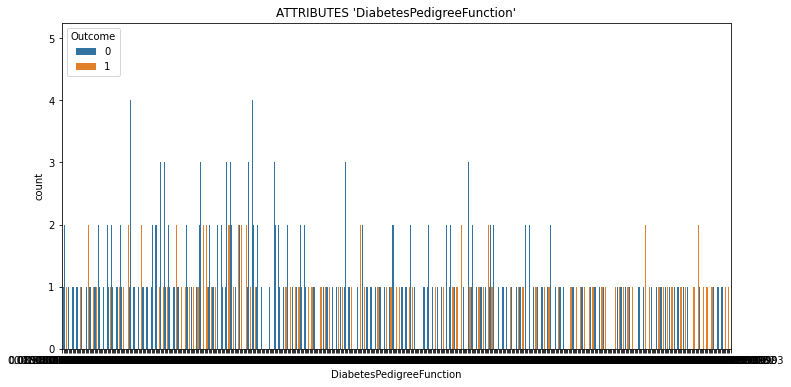

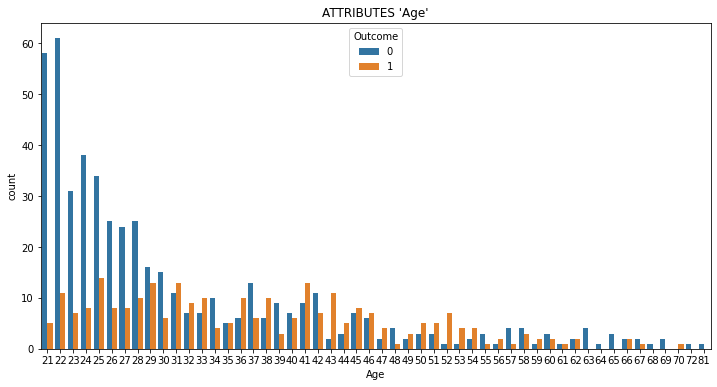

In [71]:
for i in data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("ATTRIBUTES '%s'"%i)
    sns.countplot(data[i],hue=data['Outcome'])

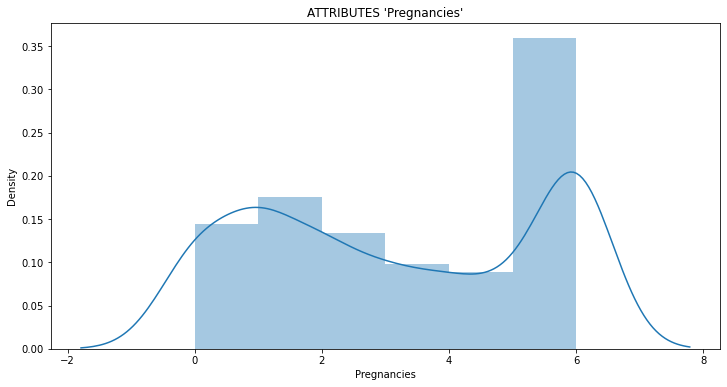

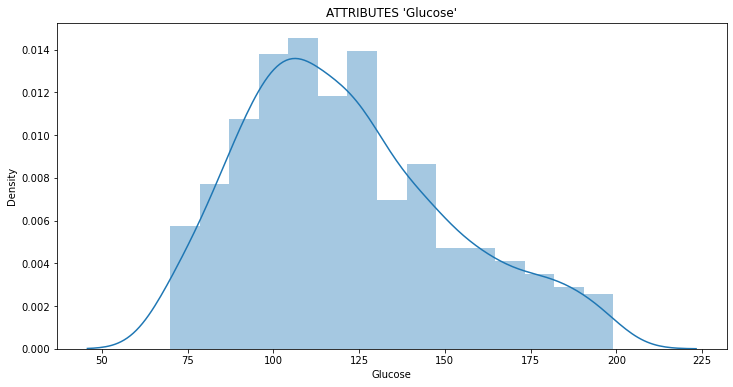

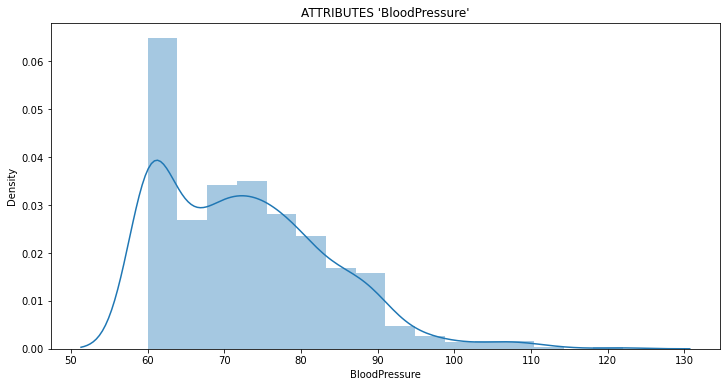

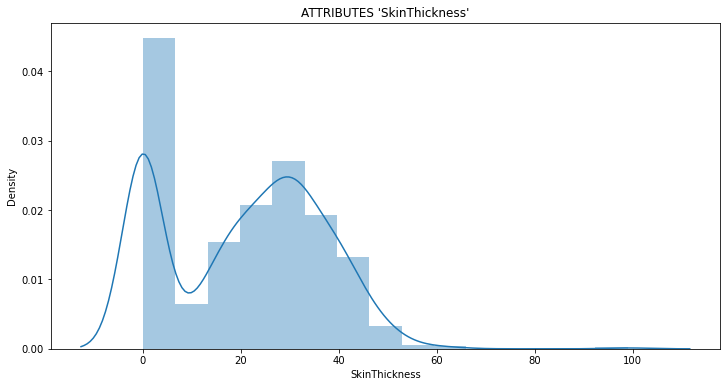

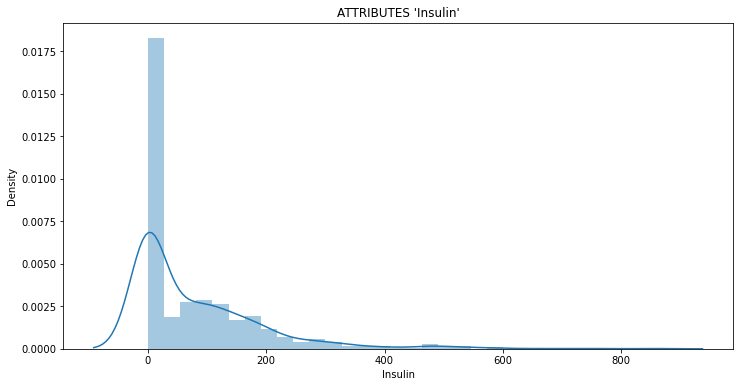

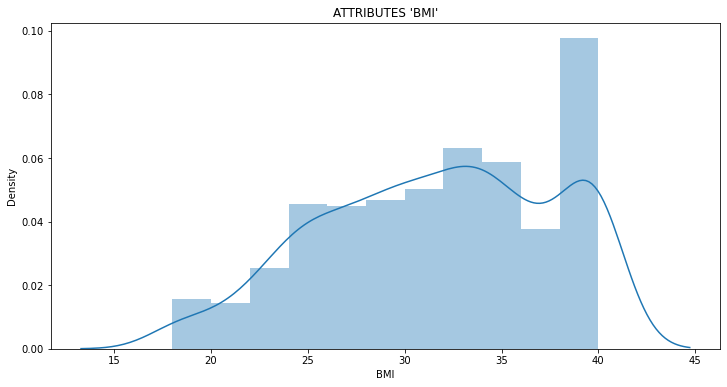

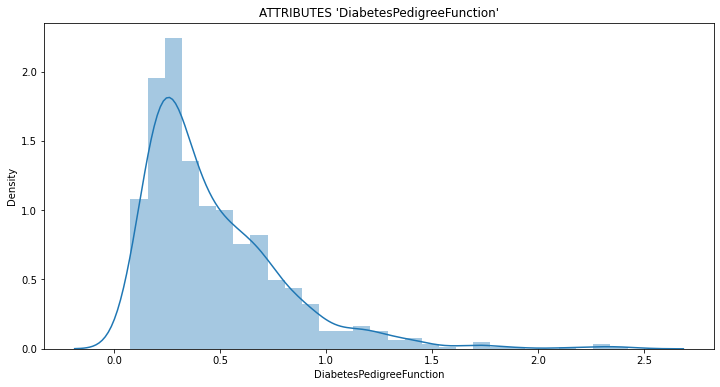

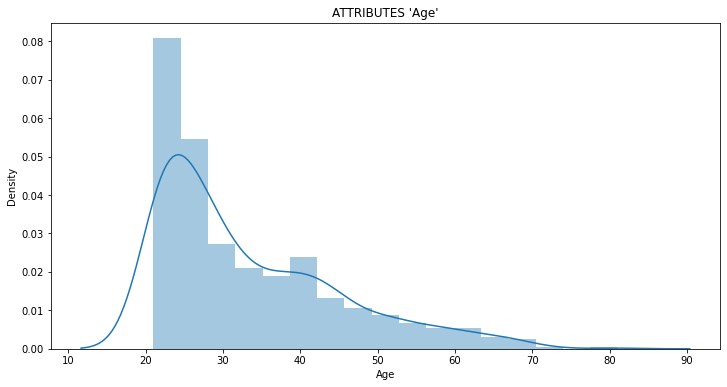

In [74]:
for i in data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("ATTRIBUTES '%s'"%i)
    sns.distplot(data[i])

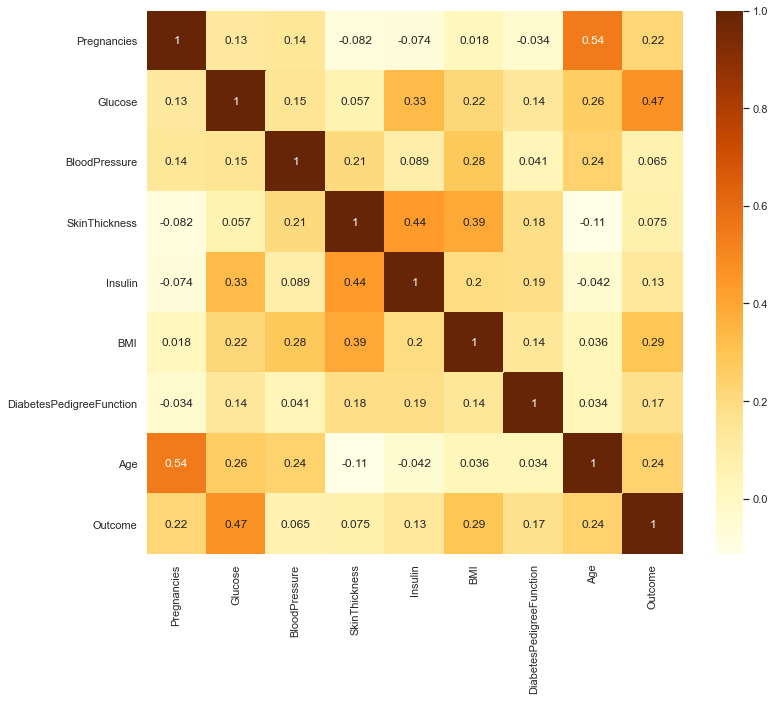

In [86]:
#heatmap
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(dataset.corr(), annot=True,cmap ='YlOrBr')

### Analysis:

### The value of Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation. According to the heatmap, we can clearly see the correlations between each attributes.

In [87]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


### From the above table , we can infer that there are no correlations between the independent variables . So, we do not need to drop any parameter to eliminate multicollinearity

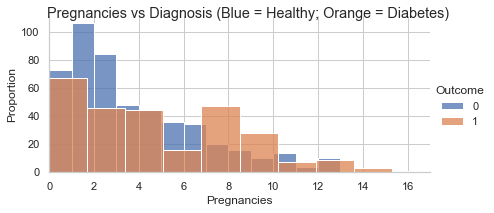

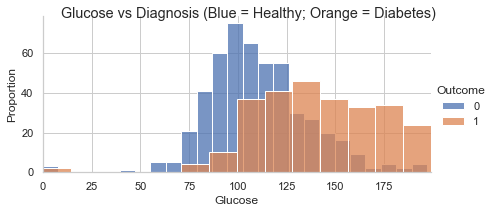

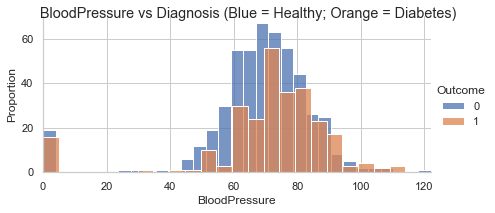

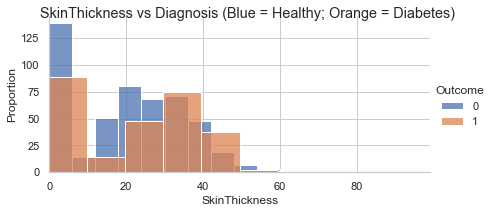

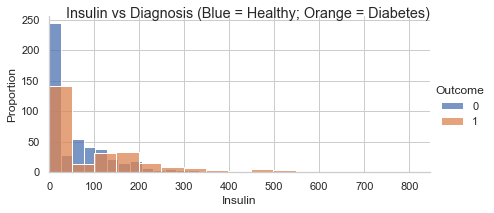

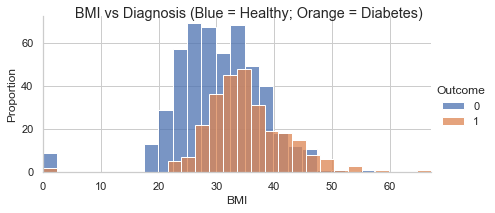

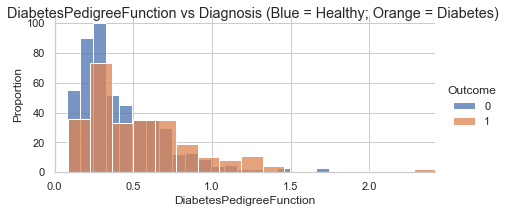

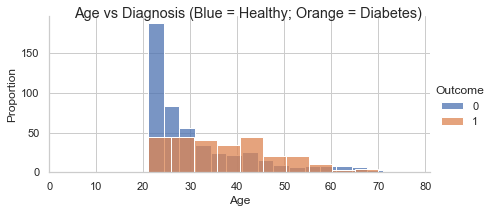

In [88]:
def plotHistogram(values,label,feature,title):
    sns.set_style("whitegrid")
    plotOne = sns.FacetGrid(values, hue=label,aspect=2)
    plotOne.map(sns.histplot,feature,kde=False)
    plotOne.set(xlim=(0, values[feature].max()))
    plotOne.add_legend()
    plotOne.set_axis_labels(feature, 'Proportion')
    plotOne.fig.suptitle(title)
    plt.show()

    
attributes = dataset.columns.values
for i in attributes[: -1]:
    plotHistogram(dataset,"Outcome",i, i + ' vs Diagnosis (Blue = Healthy; Orange = Diabetes)')

In [89]:
def show_used_models():
    print('Decision Tree = DecisionTreeClassifier')
    print('SVC = Support Vector Machine SVC')
    print('KNN = KNeighborsClassifier')
    print('GradientBoosting = GradientBoostingClassifier')
    print('Gaussian NB = GaussianNB')
    print('Random Forest = RandomForestClassifier')
    print('Ada Boost = AdaBoostClassifier')
    print('GradientBoosting = GradientBoostingClassifier \n\n')

In [90]:
# modelling
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
models = []
model_names = []
results = []
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('SVC', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GradientBoosting', GradientBoostingClassifier()))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Ada Boost', AdaBoostClassifier()))

for name, model in models:
    model.fit(X_train, y_train)
    kfold = KFold(n_splits=10)
    accuracy_results = cross_val_score(model, X_train,y_train, cv=kfold, scoring='accuracy')
    results.append(accuracy_results)
    model_names.append(name)
    accuracyMessage = "%s: %f (%f)" % (name, accuracy_results.mean(), accuracy_results.std())
    print(accuracyMessage)

Decision Tree: 0.709469 (0.041069)
SVC: 0.767051 (0.031590)
KNN: 0.722257 (0.058806)
GradientBoosting: 0.766981 (0.067470)
Gaussian NB: 0.768903 (0.052252)
Random Forest: 0.772711 (0.035685)
Ada Boost: 0.759679 (0.046430)


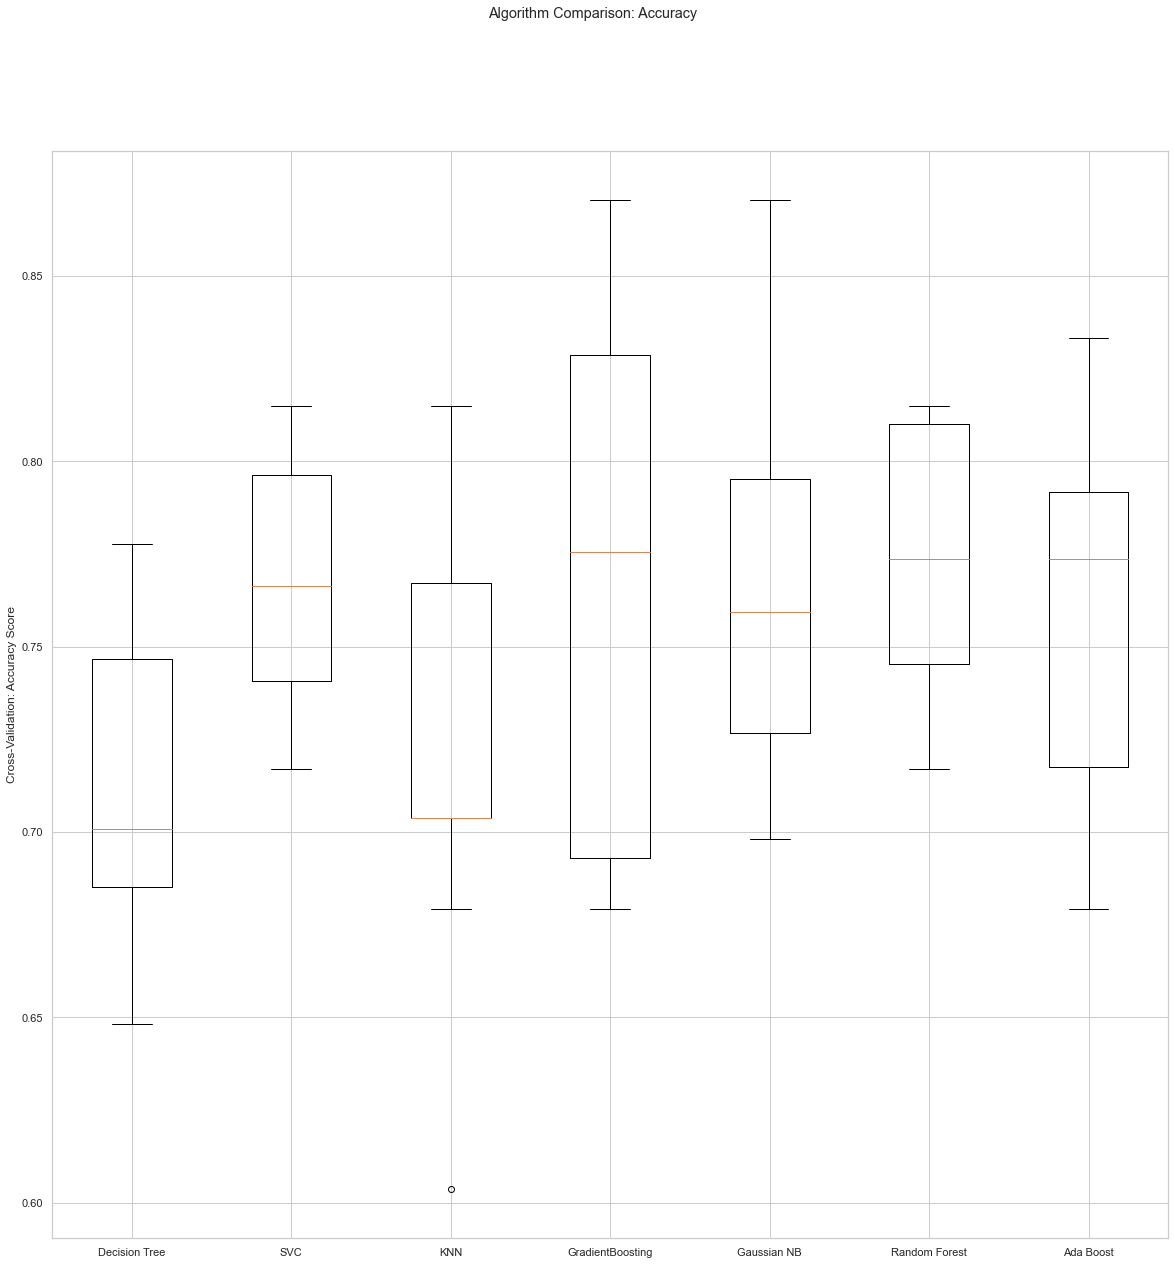

In [91]:
# boxplot for each model    
fig = plt.figure(figsize=[20,20])
fig.suptitle('Algorithm Comparison: Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_names)
ax.set_ylabel('Cross-Validation: Accuracy Score')
plt.show()

In [92]:
show_used_models()
results = {}
for name, clf in  models:

    scores = cross_val_score(clf, X_train, y_train, cv=5)
    results[name] = scores
for name, scores in results.items():
    print("%20s | Accuracy: %0.2f%% (+/- %0.2f%%)" % (name, 100*scores.mean(), 100*scores.std() * 2))

Decision Tree = DecisionTreeClassifier
SVC = Support Vector Machine SVC
KNN = KNeighborsClassifier
GradientBoosting = GradientBoostingClassifier
Gaussian NB = GaussianNB
Random Forest = RandomForestClassifier
Ada Boost = AdaBoostClassifier
GradientBoosting = GradientBoostingClassifier 


       Decision Tree | Accuracy: 71.51% (+/- 1.94%)
                 SVC | Accuracy: 75.23% (+/- 3.42%)
                 KNN | Accuracy: 72.80% (+/- 7.01%)
    GradientBoosting | Accuracy: 76.90% (+/- 6.24%)
         Gaussian NB | Accuracy: 76.91% (+/- 2.53%)
       Random Forest | Accuracy: 78.57% (+/- 6.04%)
           Ada Boost | Accuracy: 73.91% (+/- 8.92%)


In [93]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

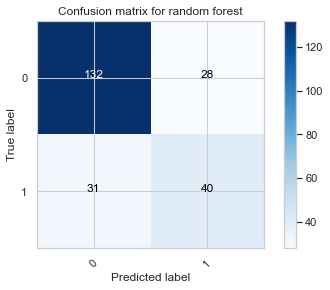

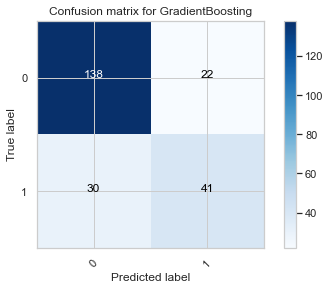

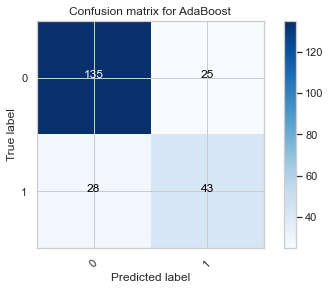

In [94]:
# according to the analysis above, we picked the top 3 high accuracy model to explore more
candidate_models = [('random forest', RandomForestClassifier()), ('GradientBoosting',GradientBoostingClassifier()), ('AdaBoost',AdaBoostClassifier())]
for name, model in candidate_models:
    model.fit(X_train, y_train)
    kfold = KFold(n_splits=10)
    accuracy = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    prediction = model.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, prediction)
    plot_confusion_matrix(cnf_matrix, classes={0:'Healthy', 1:'Diabetes'},title='Confusion matrix for '+ name)
    plt.show()

## ROC Curve

In [95]:
def no_skill_prediction():
    ns_probs = [0 for _ in range(len(y_test))]
    ns_auc = roc_auc_score(y_test, ns_probs)
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

def graph_roc_auc(model, name):
    # predict probabilities
    lr_probs = model.predict_proba(X_test)
    lr_probs = lr_probs[:, 1]
    # calculate score
    lr_auc = roc_auc_score(y_test, lr_probs)
    # print score
    print(name + ': ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.plot(lr_fpr, lr_tpr, marker='.', label=name)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()

No Skill: ROC AUC=0.500
random forest: ROC AUC=0.797
GradientBoosting: ROC AUC=0.808
AdaBoost: ROC AUC=0.802


Text(0.5, 1.0, 'ROC AUC comparison')

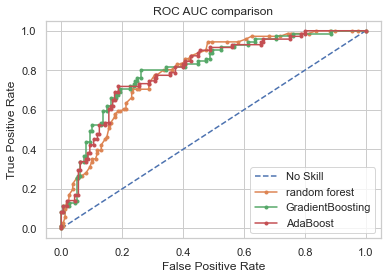

In [96]:
no_skill_prediction()
for name, model in (candidate_models):
    graph_roc_auc(model, name)
plt.title('ROC AUC comparison')

In [97]:
for name, model in candidate_models:
    model.fit(X_train, y_train)
    print('Accuracy of ' + name + ': {:.2f}'.format(model.score(X_test, y_test)))
    
    columns = dataset.columns.values
    coefficients = model.feature_importances_
    absCoefficients = abs(coefficients)
    fullList = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
    print('DecisionTreeClassifier - Feature Importance:')
    print('\n',fullList,'\n')

Accuracy of random forest: 0.76
DecisionTreeClassifier - Feature Importance:

                    Variable  absCoefficient
1                   Glucose        0.287808
5                       BMI        0.142343
7                       Age        0.121921
6  DiabetesPedigreeFunction        0.114688
0               Pregnancies        0.099902
2             BloodPressure        0.084220
4                   Insulin        0.082514
3             SkinThickness        0.066602
8                   Outcome             NaN 

Accuracy of GradientBoosting: 0.77
DecisionTreeClassifier - Feature Importance:

                    Variable  absCoefficient
1                   Glucose        0.440522
5                       BMI        0.152091
7                       Age        0.109702
6  DiabetesPedigreeFunction        0.096314
4                   Insulin        0.073429
0               Pregnancies        0.067637
2             BloodPressure        0.045053
3             SkinThickness        0.015252
8

In [98]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [100]:
columns = ['Pregnancies', 'BloodPressure', 'DiabetesPedigreeFunction','Age', 'SkinThickness', 'Insulin']

dataset = data.drop(columns, axis=1)
dataset

,Glucose,BMI,Outcome
0,148.0,33.6,1
1,85.0,26.6,0
2,183.0,23.3,1
3,89.0,28.1,0
4,137.0,43.1,1
...,...,...,...
763,101.0,32.9,0
764,122.0,36.8,0
765,121.0,26.2,0
766,126.0,30.1,1


In [101]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
print('Accuracy of GradientBoostingClassifier in Reduced Feature Space: {:.2f}'.format(clf.score(X_test, y_test)))
columns = dataset.columns
coefficients = clf.feature_importances_
absCoefficients = abs(coefficients)
fullList = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('\n GradientBoostingClassifier - Feature Importance:')
print('\n',fullList,'\n')

Accuracy of GradientBoostingClassifier in Reduced Feature Space: 0.75

 GradientBoostingClassifier - Feature Importance:

   Variable  absCoefficient
0  Glucose        0.622342
1      BMI        0.377658
2  Outcome             NaN 



## Linear Regression Model

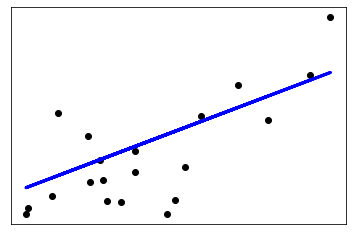

In [42]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## k-Nearest Neighbours Model

In [39]:
train_scores = []
test_scores = []

for i in range(1, 25):
  knn_clf = KNeighborsClassifier(n_neighbors=i)
  knn_clf.fit(X_train, y_train)

  train_scores.append(knn_clf.score(X_train, y_train))
  test_scores.append(knn_clf.score(X_test, y_test))

print(f"Max score of Train dataset at K = {train_scores.index(max(train_scores)) + 1} and score :- {max(train_scores)*100}%")
print(f"Max score of Test dataset at K = {test_scores.index(max(test_scores)) + 1} and score :- {round(max(test_scores)*100, 2)}%")

Max score of Train dataset at K = 1 and score :- 100.0%
Max score of Test dataset at K = 15 and score :- 78.57%


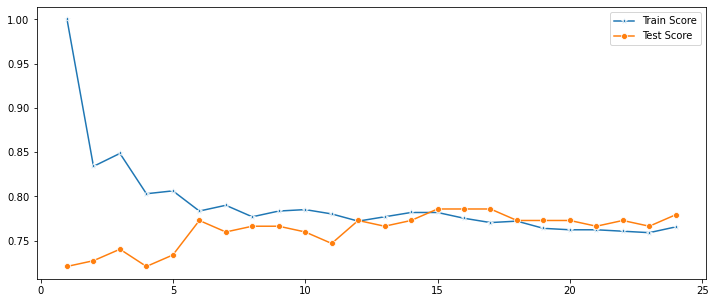

In [40]:
## training history graph 
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,25),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,25),test_scores,marker='o',label='Test Score')

## Decision Tree Model

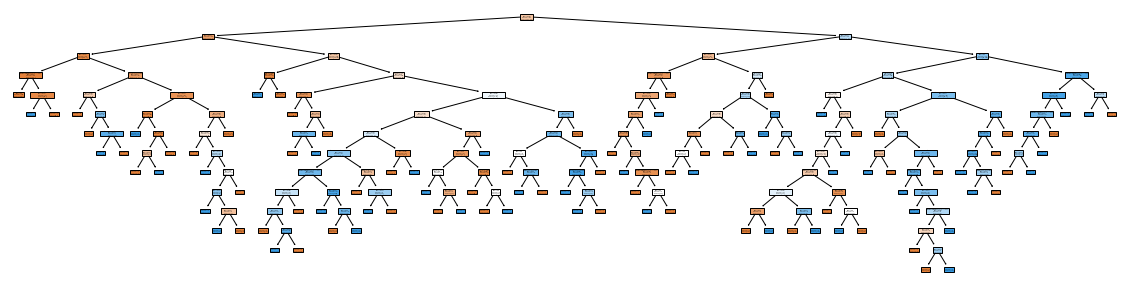

In [52]:
from sklearn.model_selection import *
from sklearn.tree import *
from sklearn.metrics import *

X = data.drop('Outcome',axis=1).values
y = data['Outcome'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

plt.figure(figsize=(20,5))
plot_tree(clf,feature_names=data.drop('Outcome',axis=1).columns,filled=True)
plt.show()

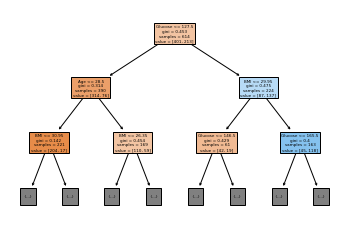

In [54]:
plot_tree(clf,feature_names=data.drop('Outcome',axis=1).columns,max_depth=2,filled=True)
plt.show()